#**Equilíbrio Químico**#

O problema é determinar a composição de uma mistura de vários produtos químicos que
satisfazem o estado de equilíbrio químico da mistura. A segunda lei da termodinâmica
implica que a uma temperatura e pressão constantes, uma mistura de produtos químicos satisfaz
seu estado de equilíbrio químico quando a energia livre da mistura é reduzida a um
mínimo. Portanto, a composição dos produtos químicos que satisfazem seu estado de equilíbrio químico pode ser encontrada minimizando a energia livre da mistura.

A seguinte notação é usada neste problema:

$m$ numero de elementos químicos na mistura

$n$ numero de compostos na mistura

$x_j$ numero de mols por composto $j, j = 1,…, n$

$s$ numero total de mols na mistura, $s =\displaystyle\sum_{j=1}^{n} x_j$

$a_{ij}$ numero de atomos do elemento $i$ na molecula do composto $j$

$b_i$ peso atomico do elemento $i$ na mistura $i = 1,…, m$

$f(x)$ energia total livre na mistura

$ob$

$\text{Min } f(x) = \displaystyle\sum_{j=1}^{n} x_j \left[c_j + \left(\frac{x_j}{s}\right)\right]$

Onde

$c_j = \left(\frac{F^0}{RT}\right)_j + ln(P)$

$s.t$

$\displaystyle\sum_{j=1}^{n} a_{ij}x_j = b_i$, $i = 1,…, n$

$x_j \geq 0$

O problema considerado é a determinação da composição de equilíbrio resultante da sujeição do composto $\frac{1}{2}\text{N}_2\text{H }_4\text{ + }\frac{1}{2}\text{O}_2$ a uma temperatura
de $3500^oK$ e uma pressão de 750 psi. Na Tabela é mostrado para cada composto
j de 10 compostos possíveis (onde os átomos monotônicos são denominados com libras) a função de energia livre de Gibbs $(F°/RT)_j$, o valor calculado de $c_j$
para P = 750 psi, e o número de átomos de H, N e O por molécula.
O número de pesos atômicos de $\text{H, N e O}$ na mistura são assumidos
ser $b_i = 2$, $b_2 = 1$ e $b_3 = 1$.

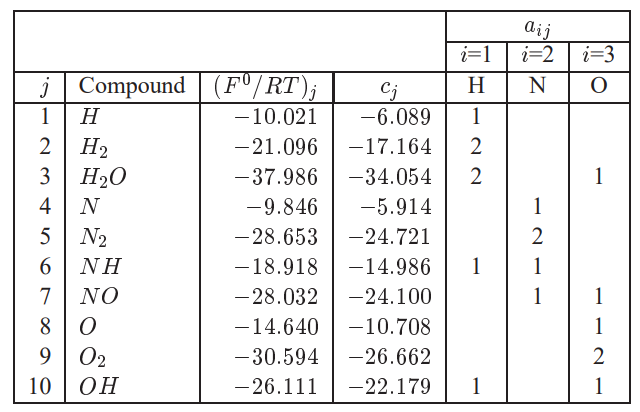


In [ ]:
!pip install -q pyomo
!wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64

     |████████████████████████████████| 11.1 MB 4.1 MB/s 
     |████████████████████████████████| 49 kB 4.2 MB/s 


In [ ]:
from pyomo.environ import *

# Abstract model
model = AbstractModel()

model.I = Set()
model.J = Set()

model.a = Param(model.I, model.J)
model.b = Param(model.I)
model.c = Param(model.J)

# variable indexed by the set J
model.x = Var(model.J, domain=NonNegativeReals)

def obj_expression(m):
    return sum(m.x[j]*(m.c[j] + log(m.x[j]) - log(sum(m.x[i] for i in m.J))) for j in m.J)

model.OBJ = Objective(rule=obj_expression, sense=minimize)

def ax_constraint_rule(m, i):
    # return the expression for the constraint for i
    return sum(m.a[i,j] * m.x[j] for j in m.J) == m.b[i]

# creates one constraint for each member of the set model.I
model.AxbConstraint = Constraint(model.I, rule=ax_constraint_rule)

# data for initiation of model
data = {None: {
    'I': {None: [1, 2, 3]},
    'J': {None: [j for j in range(1,11)]},
    'a': {(1, 1): 1, (1, 2): 2, (1, 3): 2, (1, 4): 0, (1, 5): 0, (1, 6): 1, (1, 7): 0, (1, 8): 0, (1, 9): 0, (1, 10): 1,
          (2, 1): 0, (2, 2): 0, (2, 3): 0, (2, 4): 1, (2, 5): 2, (2, 6): 1, (2, 7): 1, (2, 8): 0, (2, 9): 0, (2, 10): 0,
          (3, 1): 0, (3, 2): 0, (3, 3): 1, (3, 4): 0, (3, 5): 0, (3, 6): 0, (3, 7): 1, (3, 8): 1, (3, 9): 2, (3, 10): 1
          },
    'b': {1:2, 2:1, 3:1},
    'c': {1: -6.089, 2: -17.164, 3: -34.054, 4: -5.914, 5: -24.721, 6: -14.986, 7: -24.100, 8: -10.708, 9: -26.662, 10: -22.179}
  }
}
# instantiation of model
instance = model.create_instance(data)
instance.pprint()

3 Set Declarations
    I : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {1, 2, 3}
    J : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   10 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
    a_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain : Size : Members
        None :     2 :    I*J :   30 : {(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10)}

3 Param Declarations
    a : Size=30, Index=a_index, Domain=Any, Default=None, Mutable=False
        Key     : Value
         (1, 1) :     1
         (1, 2) :     2
         (1, 3) :     2
         (1, 4) :     0
         (1, 5) :     0
         (1, 6) :     1
         (1, 7) :     0
         (1,

In [ ]:
msolver = SolverFactory('ipopt', executable='/content/ipopt')
msolver.solve(instance, tee=True).write()
print('Energy = ', instance.OBJ())
print('Variables: ')
for var in instance.component_data_objects(Var, active=True):
  print(f'{var} = {value(var)}')

Ipopt 3.12.13: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.13, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:       14
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       55

Error in an AMPL evaluation. Run with "halt_on_ampl_error yes" to see details.
Error evaluating objective gradient at user provided starting point.
  No scaling factor for objective function computed!
Total number of variables............................:    

# **Referência**

1. http://www.math.wpi.edu/saspdf/iml/chap11.pdf (pag 42)